# Official Documents Semantic Enrichment

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from pandas import Series, DataFrame
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
output_folder = '/home/stephane/Playground/PycharmProjects/Classification/DataPrep/output'

## load helper dictionnaries

In [7]:
files_features = {}
topics = {}
with open(os.path.join(output_folder, 'files_features.pkl'), 'rb') as input_file:
    files_features = pickle.load(input_file)
with open(os.path.join(output_folder, 'topics.pkl'), 'rb') as input_file:
    topics = pickle.load(input_file)

### Files features can be used to build the feature_vector of official documents.

In [8]:
# TODO: need to sort by ascending values
# TODO: need to fill missing values
files_features = Series(files_features)
files_features.head()

IMP19901000ENG    (2585, 2603, 2616, 2630, 2643, 2671, 2683, 410...
IMP19901001ENG    (2585, 2603, 2616, 2630, 2643, 2671, 2683, 410...
IMP19901002FRE    (2567, 2603, 2630, 2670, 2671, 3134, 4103, 431...
IMP19901003ENG    (206, 2432, 2599, 2604, 2716, 3594, 3652, 4024...
IMP19901003FRE    (199, 2434, 2603, 2615, 3594, 4028, 4346, 4462...
dtype: object

### Topics series gives the correspondance between topic id and label

In [9]:
topics = Series(topics)
topics = topics.sort_index()
topics.head()


1               development aid
2    international co-operation
3           absorptive capacity
4              aid coordination
5                aid evaluation
dtype: object

In [10]:
max_topic = topics.index.max()
max_topic

6666

### Complete with missing topics to get "full" index

In [11]:
full_topic_index = range(1, max_topic+1)
full_topics = topics.reindex(full_topic_index, fill_value='n/a')

In [12]:
full_topics.head(20)

1                 development aid
2      international co-operation
3             absorptive capacity
4                aid coordination
5                  aid evaluation
6                   aid financing
7                aid institutions
8                  aid programmes
9            development agencies
10          development personnel
11               needs assessment
12                            n/a
13                   terms of aid
14                    foreign aid
15        industrial co-operation
16    international organisations
17          regional co-operation
18         regional organisations
19            bilateral relations
20        international relations
dtype: object

#### Easily access topics for a given file

In [13]:
print([(i,topics[i]) for i in files_features[0]])

[(2585, 'foreign exchange'), (2603, 'financial institutions'), (2616, 'interest rate'), (2630, 'insurance companies'), (2643, 'capital movements'), (2671, 'securities'), (2683, 'exchange rate'), (4103, 'foreign banks'), (4870, 'financial services'), (6460, 'collective investment funds'), (6511, 'investment portfolio'), (6630, 'prior approval'), (6646, 'residents'), (800, 'banks'), (801, 'financial market')]


## Load file feature vectors

In [14]:
df = pd.read_hdf(path_or_buf='DataPrep/output/feature_vectors.hdf', key='classif')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
IMP19922979FRE,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923152FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP1991433BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933258FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923401ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
IMP19902760ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19921620FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942456BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933373ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942089ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50014 entries, IMP19922979FRE to IMP1995336BIL
Columns: 6667 entries, 0 to 6666
dtypes: int8(6667)
memory usage: 318.4+ MB


### Identify columns with only zeros (i.e. unused topics)

In [16]:
v = df.sum(axis=0)
v = v[v == 0]
v.index

Int64Index([   0,   12,   22,   34,   35,   39,   41,   83,   91,   95,
            ...
            6618, 6619, 6620, 6624, 6625, 6635, 6641, 6652, 6661, 6663],
           dtype='int64', length=1910)

### Remove columns with only zeros

In [17]:
df.drop(axis=1, labels=v.index[:], inplace=True)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6655,6656,6657,6658,6659,6660,6662,6664,6665,6666
IMP19922979FRE,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923152FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP1991433BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933258FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923401ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
IMP19902760ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19921620FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942456BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933373ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942089ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use labels rather than ids

In [18]:
df.rename(columns=topics, inplace=True)
df.head(10)

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,appeal,award of contract,judgements,dispositions,parties,long-term growth,regulatory co-operation,trade costs,social media,medical radioisotopes
IMP19922979FRE,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923152FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP1991433BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933258FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19923401ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
IMP19902760ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19921620FRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942456BIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19933373ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19942089ENG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Easily access files features

In [19]:
df.iloc[0][df.iloc[0] > 0]

development aid         1
economic development    1
supply and demand       1
ships                   1
shipbuilding            1
production              1
reproduction            1
questionnaires          1
distribution            1
Name: IMP19922979FRE, dtype: int8

## Load time based topics usage

In [20]:
dated_df = pd.read_hdf(path_or_buf='DataPrep/output/dated_feature_vectors.hdf', key='dated')
dated_df = dated_df.sort_index()
dated_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-02,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1990-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-04,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1990-01-08,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1990-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990-01-11,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Fill with any missing day

In [34]:
date_index = pd.date_range(start='1989-12-21', end='1995-06-23', freq='D')
dated_df = dated_df.reindex(date_index, fill_value=0)
dated_df.head()

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,appeal,award of contract,judgements,dispositions,parties,long-term growth,regulatory co-operation,trade costs,social media,medical radioisotopes
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Identify columns with only zeros

In [35]:
v = dated_df.sum(axis=0)
v = v[v == 0]
v.index

Index([], dtype='object')

#### Remove columns with only zeros

In [36]:
dated_df.drop(axis=1, labels=v.index[:], inplace=True)
dated_df.head(10)

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,appeal,award of contract,judgements,dispositions,parties,long-term growth,regulatory co-operation,trade costs,social media,medical radioisotopes
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use labels rather than ids

In [37]:
dated_df.rename(columns=topics, inplace=True)
dated_df.head(10)

,development aid,international co-operation,absorptive capacity,aid coordination,aid evaluation,aid financing,aid institutions,aid programmes,development agencies,development personnel,...,appeal,award of contract,judgements,dispositions,parties,long-term growth,regulatory co-operation,trade costs,social media,medical radioisotopes
1989-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989-12-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Easily access file features

In [25]:
dated_df.iloc[8][dated_df.iloc[8] > 0]

sales                       1
economic development        1
lists of documents          1
experts                     1
conferences                 1
development co-operation    1
Name: 1989-12-29 00:00:00, dtype: int64

### Identify most used topics

In [26]:
histo = dated_df.apply(np.cumsum).iloc[-1]
histo.sort_values(inplace=True, ascending=False)
histo.head(10)

development co-operation    16806
economic co-operation       13403
economic development         9866
development aid              8149
agendas                      7774
conferences                  7262
work programmes              7166
labour                       5566
experts                      4160
budget                       3916
Name: 1995-06-23 00:00:00, dtype: int64

In [27]:
histo.head(10).index

Index(['development co-operation', 'economic co-operation',
       'economic development', 'development aid', 'agendas', 'conferences',
       'work programmes', 'labour', 'experts', 'budget'],
      dtype='object')

### See time evolution of topics frequency

In [28]:
dev_aid = dated_df.loc[:,histo.head(10).index[:]]
dev_aid.head(10)

,development co-operation,economic co-operation,economic development,development aid,agendas,conferences,work programmes,labour,experts,budget
1989-12-21,0,0,0,0,0,0,0,0,0,0
1989-12-22,0,0,0,0,0,0,0,0,0,0
1989-12-23,0,0,0,0,0,0,0,0,0,0
1989-12-24,0,0,0,0,0,0,0,0,0,0
1989-12-25,0,0,0,0,0,0,0,0,0,0
1989-12-26,0,0,0,0,0,0,0,0,0,0
1989-12-27,0,0,0,0,0,0,0,0,0,0
1989-12-28,0,0,0,0,0,0,0,0,0,0
1989-12-29,1,0,1,0,0,1,0,0,1,0
1989-12-30,0,0,0,0,0,0,0,0,0,0


In [29]:
dev_aid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 1989-12-21 to 1995-06-23
Freq: D
Data columns (total 10 columns):
development co-operation    2011 non-null int64
economic co-operation       2011 non-null int64
economic development        2011 non-null int64
development aid             2011 non-null int64
agendas                     2011 non-null int64
conferences                 2011 non-null int64
work programmes             2011 non-null int64
labour                      2011 non-null int64
experts                     2011 non-null int64
budget                      2011 non-null int64
dtypes: int64(10)
memory usage: 172.8 KB


### Plot

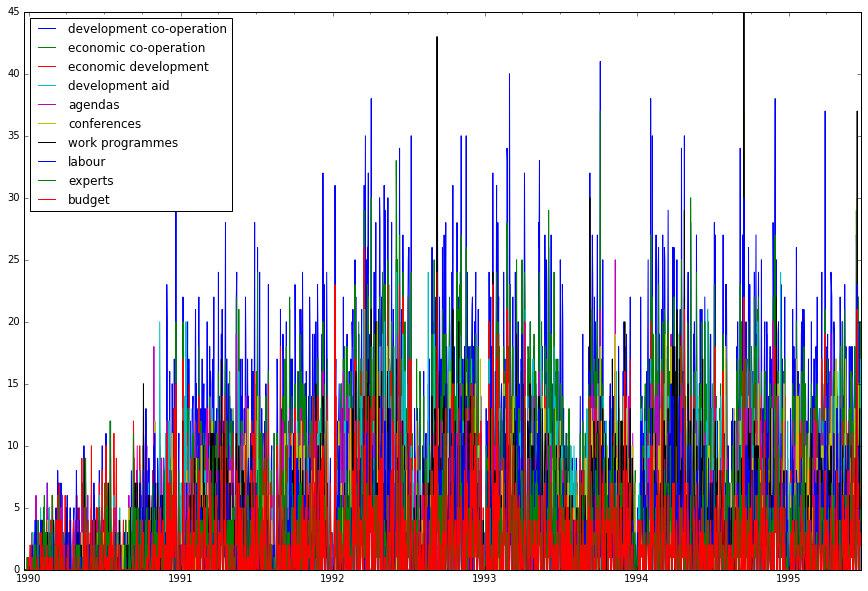

In [30]:
dev_aid.plot()
plt.show()

### Monthly frequency should be better

In [31]:
dev_aid = dev_aid.resample('M').sum()

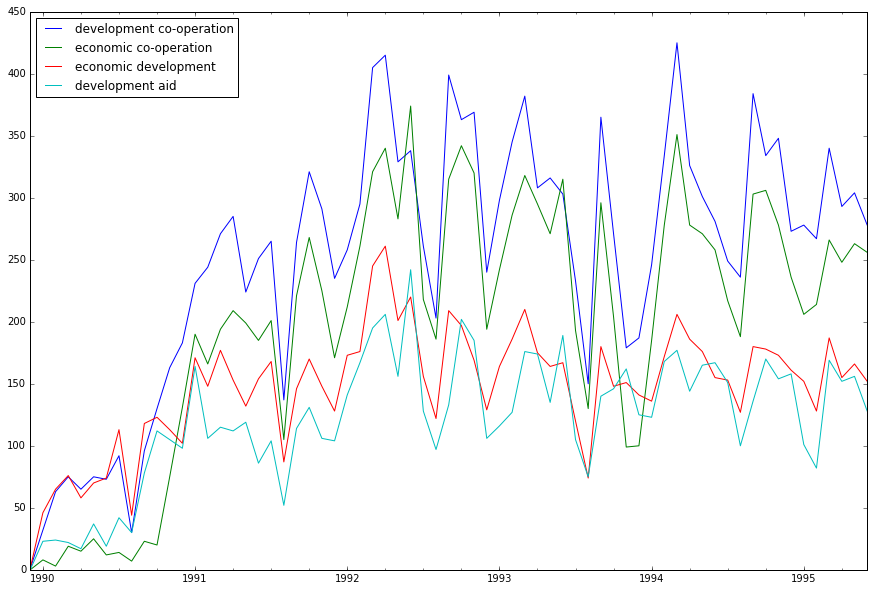

In [32]:
dev_aid.iloc[:,0:4].plot()
plt.show()

### Statistical info about topics occurrence frequencies

In [43]:
pd.DataFrame([dev_aid.min(), dev_aid.max(), dev_aid.mean()], ['min', 'max', 'mean']).T

,min,max,mean
development co-operation,1.0,425.0,250.835821
economic co-operation,0.0,374.0,200.044776
economic development,1.0,261.0,147.253731
development aid,0.0,242.0,121.626866
agendas,0.0,202.0,116.029851
conferences,1.0,184.0,108.388060
work programmes,0.0,230.0,106.955224
labour,0.0,165.0,83.074627
experts,1.0,110.0,62.089552
budget,0.0,119.0,58.447761


In [45]:
dev_aid.describe().T

,count,mean,std,min,25%,50%,75%,max
development co-operation,67.0,250.835821,103.418625,1.0,195.0,271.0,323.5,425.0
economic co-operation,67.0,200.044776,104.255722,0.0,148.5,214.0,278.0,374.0
economic development,67.0,147.253731,48.093767,1.0,125.0,154.0,175.5,261.0
development aid,67.0,121.626866,52.135266,0.0,100.5,127.0,160.0,242.0
agendas,67.0,116.029851,47.223187,0.0,87.5,121.0,152.0,202.0
conferences,67.0,108.388060,47.284425,1.0,78.0,111.0,144.0,184.0
work programmes,67.0,106.955224,52.037118,0.0,71.0,107.0,141.5,230.0
labour,67.0,83.074627,39.037012,0.0,53.0,87.0,106.5,165.0
experts,67.0,62.089552,24.637205,1.0,47.0,61.0,76.5,110.0
budget,67.0,58.447761,28.632088,0.0,36.0,60.0,78.0,119.0


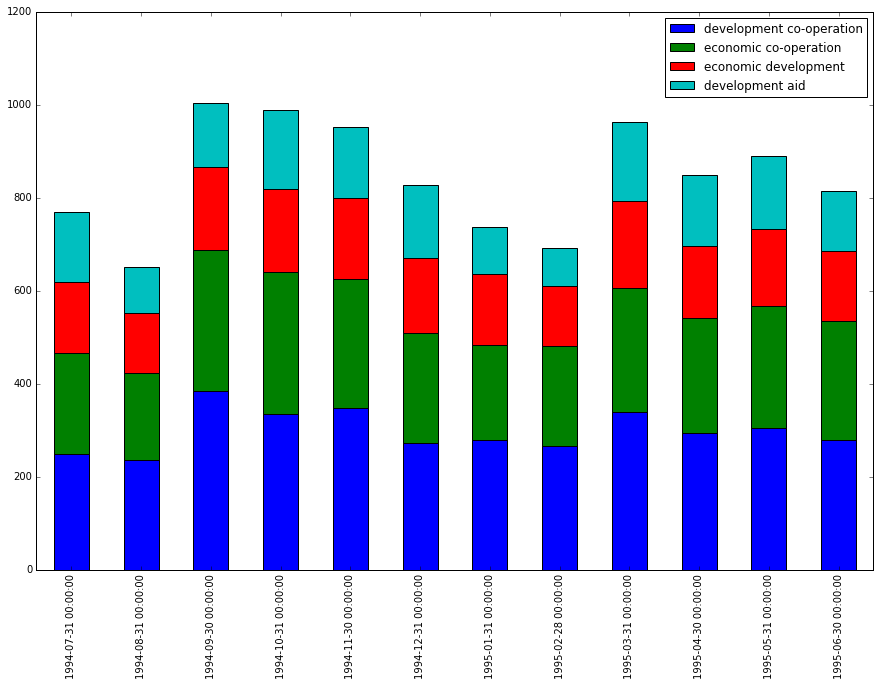

In [77]:
dev_aid.iloc[-12:,0:4].plot(kind='bar', stacked=True)
plt.show()

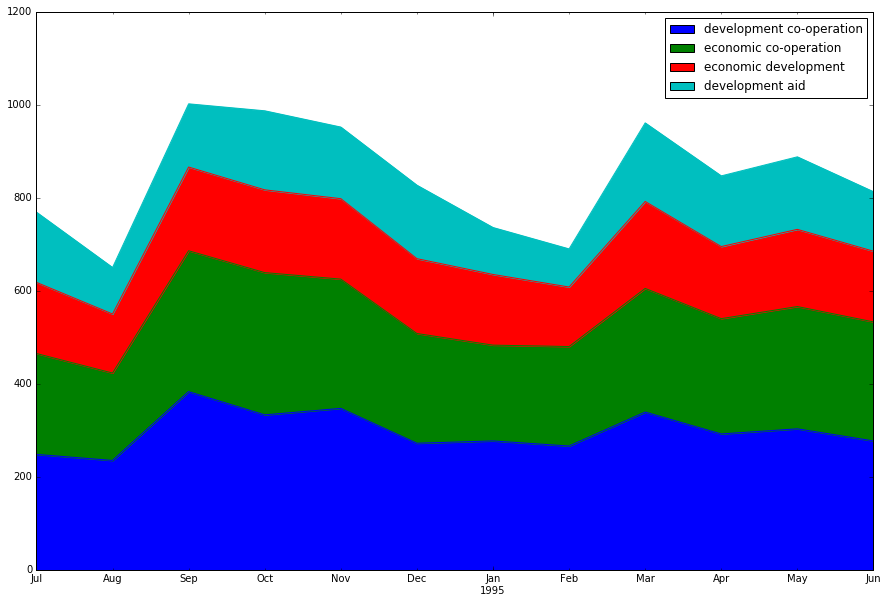

In [58]:
dev_aid.iloc[-12:,0:4].plot(kind='area')
plt.show()

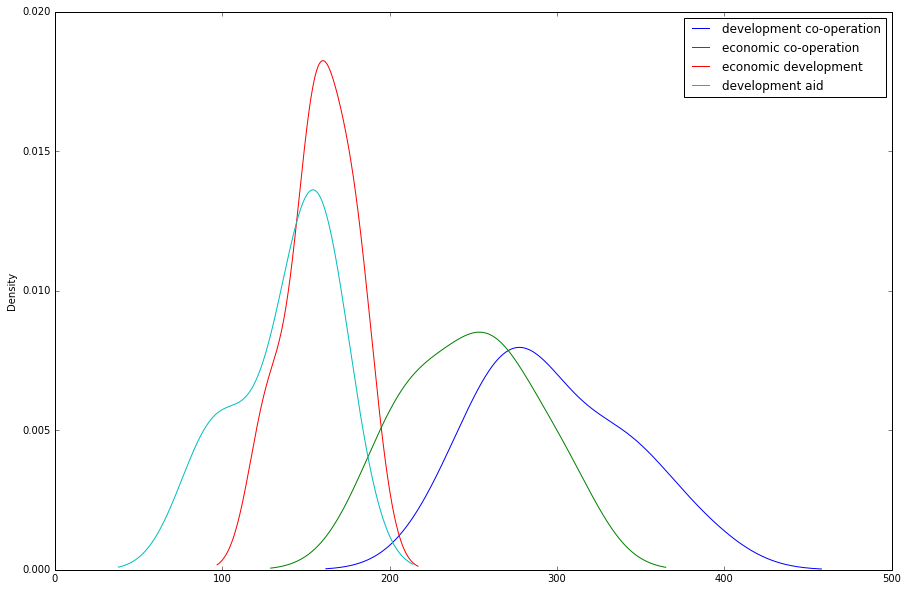

In [61]:
dev_aid.iloc[-12:,0:4].plot(kind='kde')
plt.show()

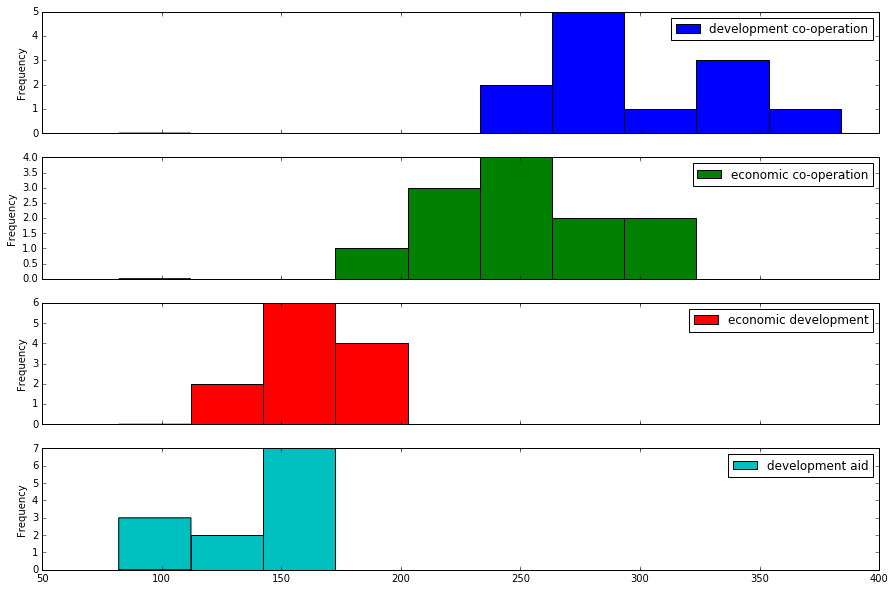

In [66]:
dev_aid.iloc[-12:,0:4].plot(kind='hist', subplots=True)
plt.show()

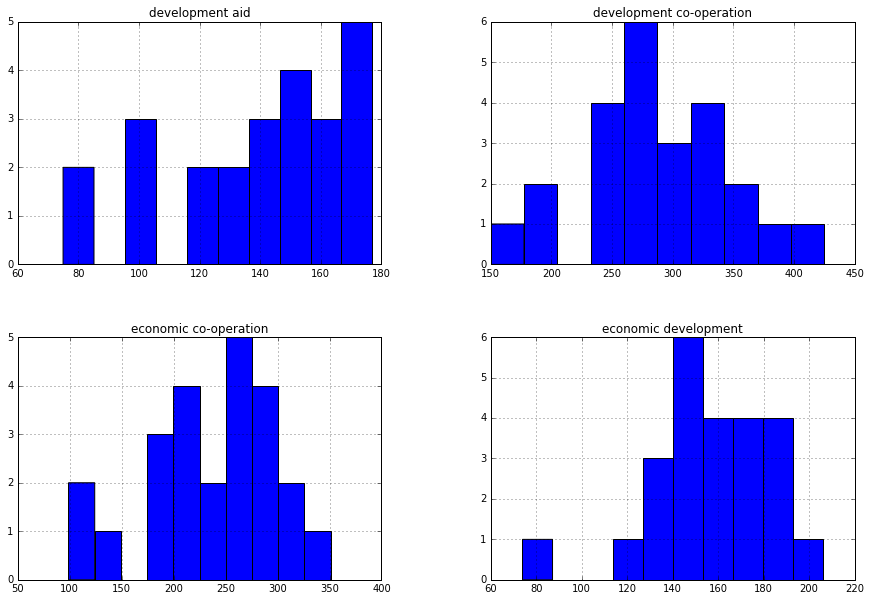

In [79]:
dev_aid.iloc[-24:,0:4].hist()
plt.show()

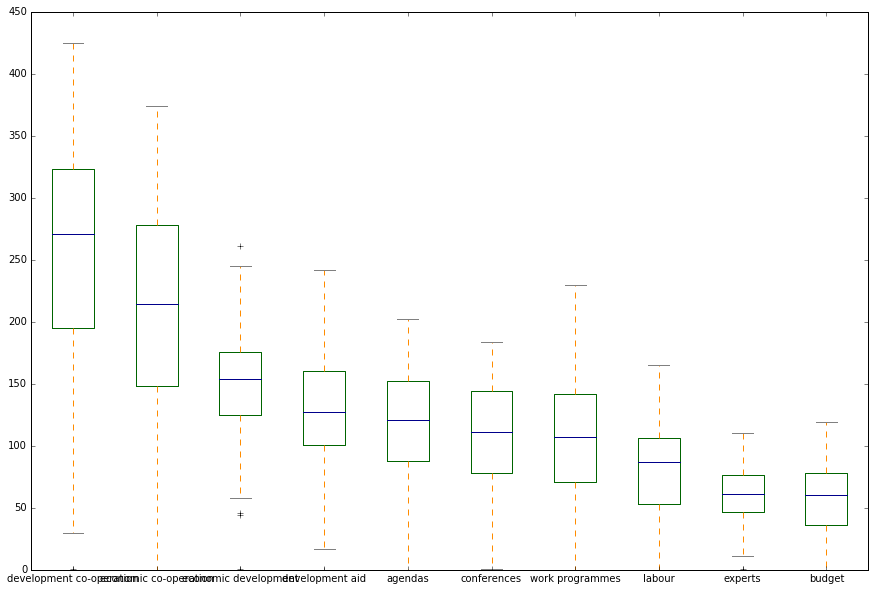

In [83]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
dev_aid.plot.box(color=color)
plt.show()

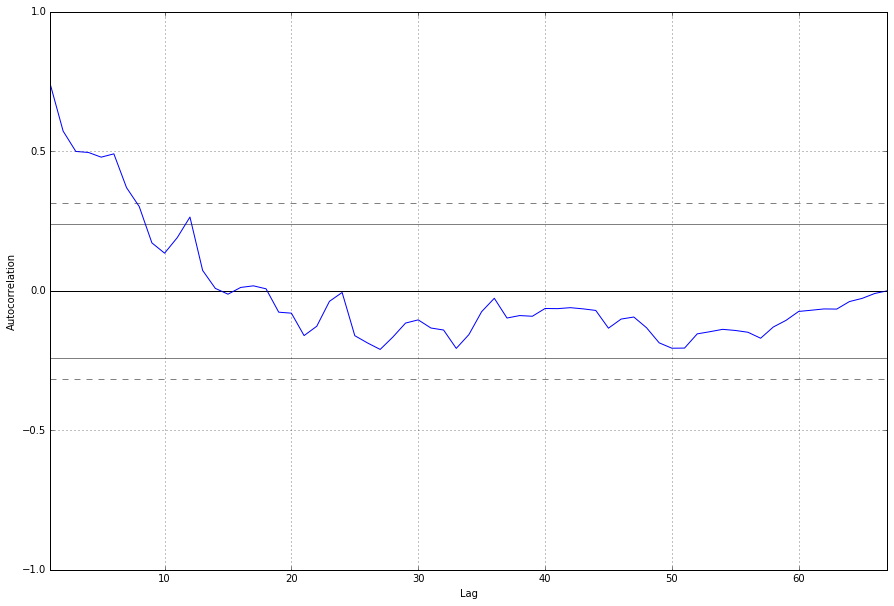

In [76]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(dev_aid.iloc[:,0])
plt.show()

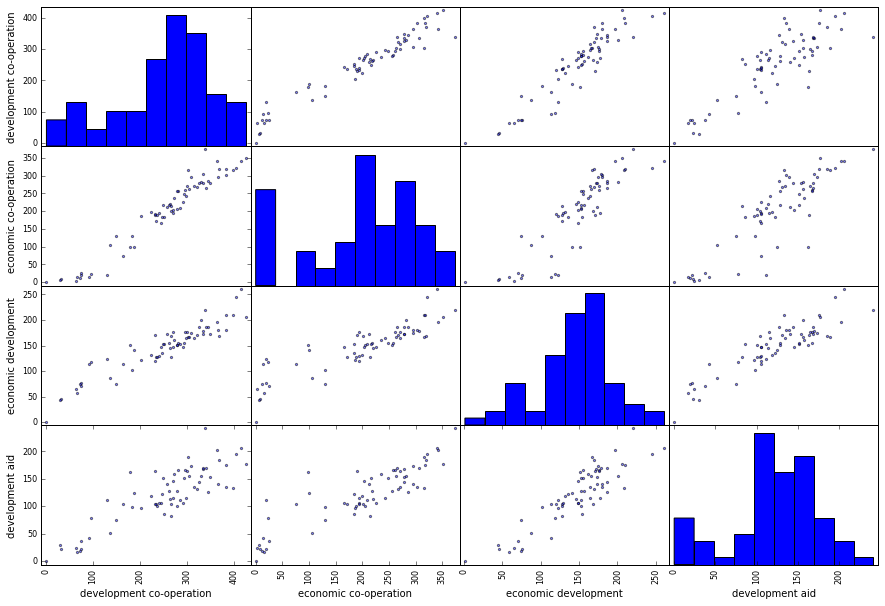

In [85]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dev_aid.iloc[:,0:4])
plt.show()

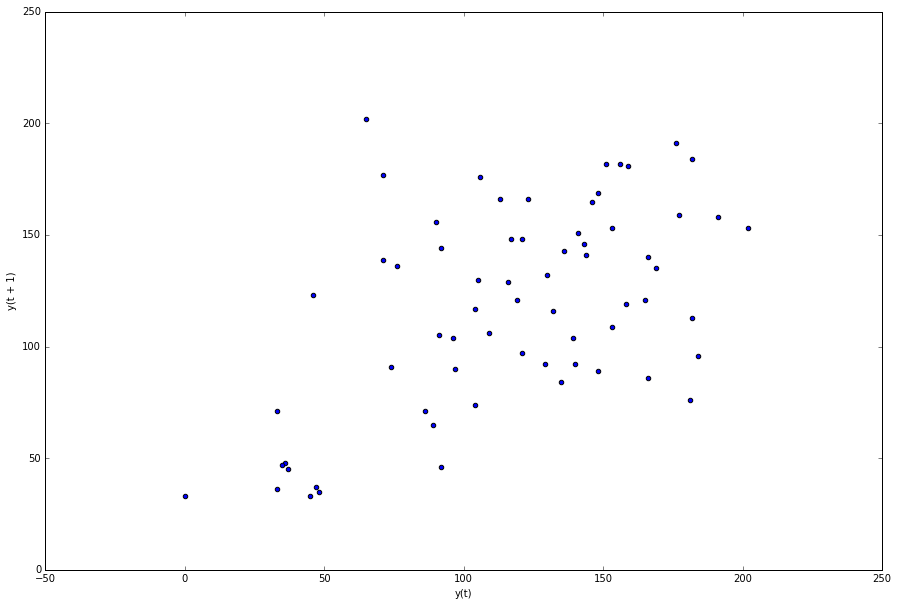

In [91]:
from pandas.tools.plotting import lag_plot
lag_plot(dev_aid.iloc[:,4])
plt.show()